# Physics 641 - Homework 5

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

### Homework Extension: Non-linear temperature dependence in the Maxwell-Boltzmann Speed Distribution.

#### Consider the Maxwell-Boltzmann Speed Distribution if it were to have a non-linear temperature dependence, such that
$$f(v)dv=4\pi\left(\frac{m}{2\pi k_BT^2}\right)^{3/2}v^2\text{e}^{-mv^2/2k_BT^2}.$$
#### We will then discuss how this would affect the makeup of our atmosphere.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.integrate import quad

#### This cell defines the new Maxwell-Boltzmann Speed Distribution

In [2]:
'''Function to calculate Maxwell-Boltzmann Speed Distribution'''
def MSD(v, m, T):
    prob = 4 * np.pi * (m / (2 * np.pi * kB * T**2))**(3 / 2) * v**2 * np.exp(-m * v**2 / (2 * kB * T**2))
    return prob

#### This cell calculates and plots the MSD for various temperatures to show the effects of the non-linear temperature dependence of the MSD.

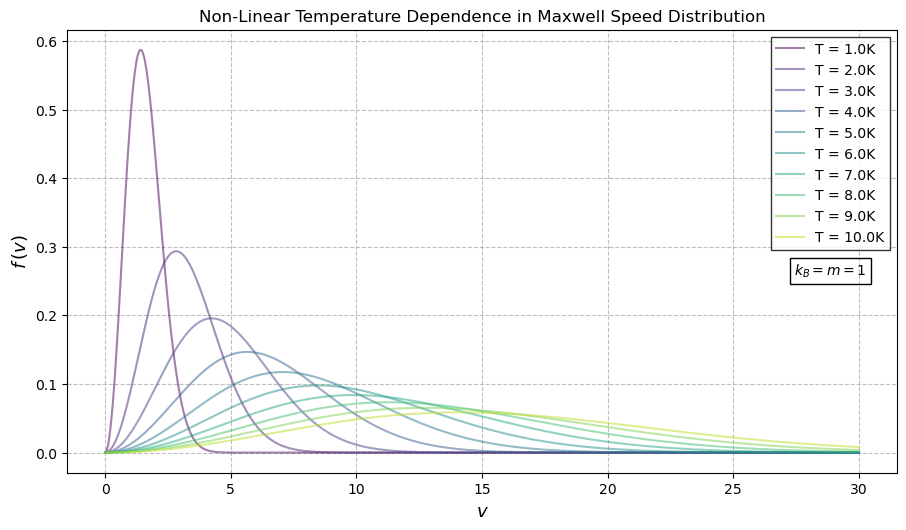

In [3]:
'''Constants'''
m = 1   #mass
kB = 1  #Boltzmann's constant

'''Range of temperatures [K]'''
temps = np.linspace(1, 10, 10)

'''Create figure and plot results'''
colors = plt.cm.viridis(np.linspace(0, 0.9, len(temps)))
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
fig.tight_layout(pad = 1)
ax.set_xlabel('$v$', fontsize = 13)
ax.set_ylabel('$f\,(v)$', fontsize = 13)
ax.set_title('Non-Linear Temperature Dependence in Maxwell Speed Distribution')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.75)
ax.annotate('$k_B=m=1$', xy = (0.92, 0.455), xycoords = 'axes fraction',
             ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
for i, T in zip(range(len(temps)), temps):
    v = np.linspace(0, 30, 1000)  #arbitrary velocities [m / s]
    msd = MSD(v, m, T)            #Maxwell Speed Distribution
    ax.plot(v, msd, color = colors[i], alpha = 0.5, label = f'T = {T}K')
legend = ax.legend(loc = 'upper right', prop = {'size': 10}, fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/MSD_NonlinearT.png', bbox_inches = 'tight')

#### This cell calculates the new most probable, mean, and root-mean-square speeds for the new Maxwell-Boltzmann Speed Distribution for both hydrogen and nitrogen molecules.  It then discusses whether these molecules would be captured or would escape Earth's atmosphere for these values.

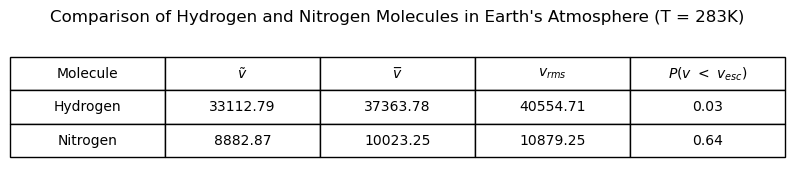

In [4]:
'''Constants'''
T = 283                  #average temperature of atmosphere [K]
kB = 1.38 * 10**-23      #Boltzmann's constant [J / K]
m_H2 = 2.016 * 10**-27   #mass of hydrogen molecule [kg]
m_N2 = 28.014 * 10**-27  #mass of nitrogen molecule [kg]
v_esc = 1.12 * 10**4     #escape velocity of earth [m / s]

'''Calculate most probable, mean, and rms speeds'''
v_most_H2, v_most_N2 = np.sqrt(2 * kB * T**2 / m_H2), np.sqrt(2 * kB * T**2 / m_N2)
v_mean_H2, v_mean_N2 = np.sqrt(8 * kB * T**2 / (np.pi * m_H2)), np.sqrt(8 * kB * T**2 / (np.pi * m_N2))
v_rms_H2, v_rms_N2 = np.sqrt(3 * kB * T**2 / m_H2), np.sqrt(3 * kB * T**2 / m_N2)

'''Calculate probability of molecule with v > v_esc'''
P_H2, _ = quad(MSD, v_esc, np.inf, args = (m_H2, T))
P_N2, _ = quad(MSD, v_esc, np.inf, args = (m_N2, T))

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (10, 2))
ax.axis('off')
ax.set_title(f"Comparison of Hydrogen and Nitrogen Molecules in Earth's Atmosphere (T = {T}K)")
labels = ['Molecule', '$v\u0303$', '$v\u0305$', '$v_{rms}$', '$P(v\ <\ v_{esc})$']
table = [['Hydrogen', f'{v_most_H2:.2f}', f'{v_mean_H2:.2f}', f'{v_rms_H2:.2f}', f'{1 - P_H2:.2f}'],
         ['Nitrogen', f'{v_most_N2:.2f}', f'{v_mean_N2:.2f}', f'{v_rms_N2:.2f}', f'{1 - P_N2:.2f}']]
the_table = ax.table(cellText = table, colLabels = labels, loc = 'center', cellLoc = 'center')
the_table.scale(1, 2)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/MSD_NonlinearT_atmosphere.png', bbox_inches = 'tight')

#### This cell calculates the new most probable, mean, and root-mean-square speeds for the real Maxwell-Boltzmann Speed Distribution for both hydrogen and nitrogen molecules.  It then discusses whether these molecules would be captured or would escape Earth's atmosphere for these values.

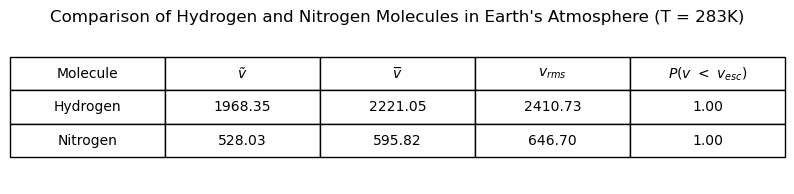

In [5]:
'''Function to calculate the real Maxwell-Boltzmann Speed Distribution'''
def MSD_real(v, m, T):
    prob = 4 * np.pi * (m / (2 * np.pi * kB * T))**(3 / 2) * v**2 * np.exp(-m * v**2 / (2 * kB * T))
    return prob

'''Constants'''
T = 283                  #average temperature of atmosphere [K]
kB = 1.38 * 10**-23      #Boltzmann's constant [J / K]
m_H2 = 2.016 * 10**-27   #mass of hydrogen molecule [kg]
m_N2 = 28.014 * 10**-27  #mass of nitrogen molecule [kg]
v_esc = 1.12 * 10**4     #escape velocity of earth [m / s]

'''Calculate most probable, mean, and rms speeds'''
v_most_H2, v_most_N2 = np.sqrt(2 * kB * T / m_H2), np.sqrt(2 * kB * T / m_N2)
v_mean_H2, v_mean_N2 = np.sqrt(8 * kB * T / (np.pi * m_H2)), np.sqrt(8 * kB * T / (np.pi * m_N2))
v_rms_H2, v_rms_N2 = np.sqrt(3 * kB * T / m_H2), np.sqrt(3 * kB * T / m_N2)

'''Calculate probability of molecule with v > v_esc'''
P_H2, _ = quad(MSD_real, v_esc, np.inf, args = (m_H2, T))
P_N2, _ = quad(MSD_real, v_esc, np.inf, args = (m_N2, T))

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (10, 2))
ax.axis('off')
ax.set_title(f"Comparison of Hydrogen and Nitrogen Molecules in Earth's Atmosphere (T = {T}K)")
labels = ['Molecule', '$v\u0303$', '$v\u0305$', '$v_{rms}$', '$P(v\ <\ v_{esc})$']
table = [['Hydrogen', f'{v_most_H2:.2f}', f'{v_mean_H2:.2f}', f'{v_rms_H2:.2f}', f'{1 - P_H2:.2f}'],
         ['Nitrogen', f'{v_most_N2:.2f}', f'{v_mean_N2:.2f}', f'{v_rms_N2:.2f}', f'{1 - P_N2:.2f}']]
the_table = ax.table(cellText = table, colLabels = labels, loc = 'center', cellLoc = 'center')
the_table.scale(1, 2)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/MSD_atmosphere.png', bbox_inches = 'tight')